# Data Preparation

Redo data prep in this script 

In [1]:
import pandas as pd
import rdata
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from random import sample
from IPython.display import Markdown
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
path_l2_trimmed = r"../data/version 1.1/primary data/eye tracking data/joint_data_l2_trimmed.rda"
l2_trimmed_parsed = rdata.parser.parse_file(path_l2_trimmed)
l2_trimmed_converted = rdata.conversion.convert(l2_trimmed_parsed)
original_df = l2_trimmed_converted['joint.data']
original_df

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669949,tr_52,12,12.0,12,1.0,5.0,144.0,their,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,354.0,1.0,1.0,0.0,0.0,0.0,197.0,0.0,0.0,9,6,6.0,3.0,0.0,197.0,1.0,9,6,6.0,3.0,0.0,197.0,tr,None,tr_52
669950,tr_52,12,12.0,12,1.0,5.0,145.0,connectivity,0.0,0.0,3.0,1.0,4.0,1.0,1.0,1.0,872.0,1.0,1.0,0.0,0.0,0.0,222.0,0.0,0.0,6,13,3.0,3.0,-3.5,222.0,1.0,6,13,3.0,3.0,-3.5,222.0,tr,None,tr_52
669951,tr_52,12,12.0,12,1.0,5.0,146.0,in,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,220.0,1.0,1.0,0.0,0.0,0.0,220.0,0.0,0.0,9,5,9.0,0.0,-1.5,220.0,1.0,9,5,9.0,0.0,-1.5,220.0,tr,None,tr_52
669952,tr_52,12,12.0,12,1.0,5.0,147.0,personal,0.0,0.0,2.0,1.0,4.0,1.0,0.0,1.0,661.0,1.0,1.0,0.0,0.0,1.0,233.0,0.0,0.0,13,-11,13.0,0.0,-4.5,233.0,1.0,13,-11,13.0,0.0,-4.5,233.0,tr,None,tr_52


In [3]:
df = original_df

In [4]:
df.columns

Index(['subid', 'trialid', 'trialnum', 'itemid', 'cond', 'sentnum', 'ianum',
       'ia', 'blink', 'skip', 'nrun', 'reread', 'nfix', 'refix', 'reg.in',
       'reg.out', 'dur', 'firstrun.skip', 'firstrun.nfix', 'firstrun.refix',
       'firstrun.reg.in', 'firstrun.reg.out', 'firstrun.dur',
       'firstrun.gopast', 'firstrun.gopast.sel', 'firstfix.sac.in',
       'firstfix.sac.out', 'firstfix.launch', 'firstfix.land',
       'firstfix.cland', 'firstfix.dur', 'singlefix', 'singlefix.sac.in',
       'singlefix.sac.out', 'singlefix.launch', 'singlefix.land',
       'singlefix.cland', 'singlefix.dur', 'lang', 'trial', 'uniform_id'],
      dtype='object')

## Selection of First Pass duration (FP):
Time spent from first entering a word to first leaving it (including re-fixations within the word).


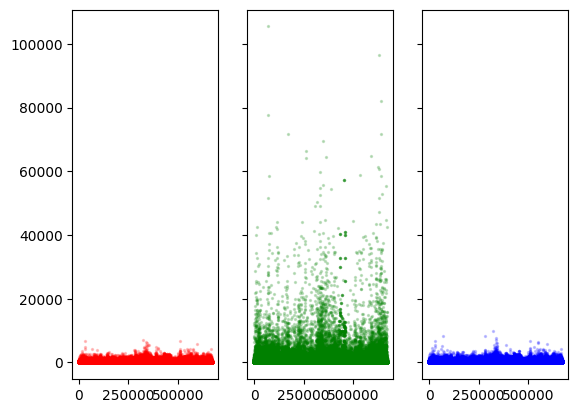

In [5]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast"], s=2, color = "green", alpha=0.2)
ax[2].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

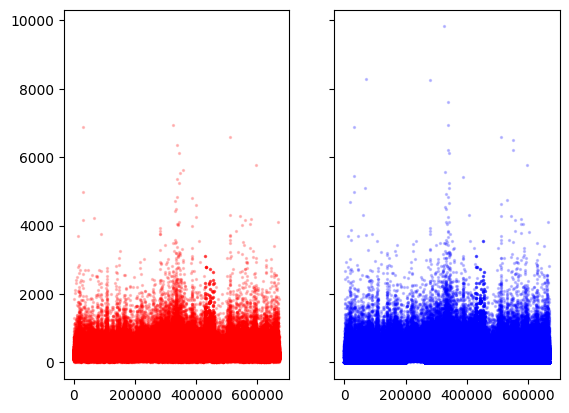

In [6]:
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].scatter(df.index, df["firstrun.dur"], s=2, color = "red", alpha=0.2)
ax[1].scatter(df.index, df["firstrun.gopast.sel"], s=2, color = "blue", alpha=0.2)
plt.show()

In [7]:
df["firstrun.dur"].describe()

count    505043.000000
mean        290.402588
std         196.419997
min           2.000000
25%         178.000000
50%         241.000000
75%         343.000000
max        6932.000000
Name: firstrun.dur, dtype: float64

In [8]:
df["firstrun.gopast.sel"].describe()

count    505043.000000
mean        268.020836
std         247.274139
min           0.000000
25%         140.000000
50%         232.000000
75%         356.000000
max        9823.000000
Name: firstrun.gopast.sel, dtype: float64

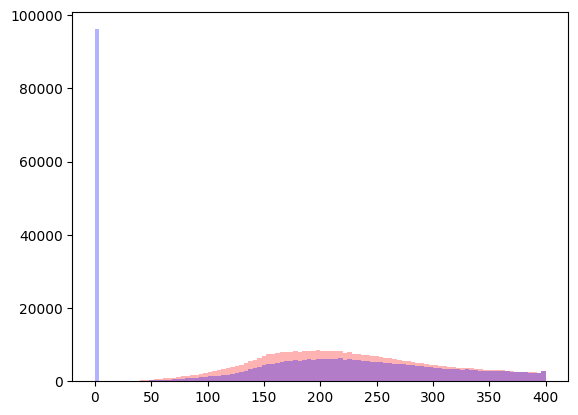

In [9]:
dur_cnt, dur_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 400))
sel_cnt, sel_bins = np.histogram(df["firstrun.gopast.sel"], bins=100, range=(0, 400))

plt.hist(dur_bins[:-1], dur_bins, weights=dur_cnt, color="red", alpha=0.3)
plt.hist(sel_bins[:-1], sel_bins, weights=sel_cnt, color="blue", alpha=0.3)
plt.show()

## Validation of chosen matrics

In [10]:
tmp = df[["firstfix.dur", "firstrun.dur", "dur"]]

In [11]:
tmp[tmp["firstfix.dur"] > tmp["firstrun.dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


In [12]:
tmp[tmp["firstrun.dur"] > tmp["dur"]]  #should be empty

,firstfix.dur,firstrun.dur,dur


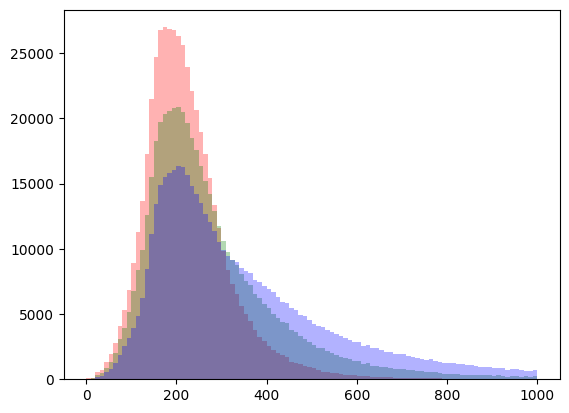

In [13]:
FF_cnt, FF_bins = np.histogram(df["firstfix.dur"], bins=100, range=(0, 1000))
FP_cnt, FP_bins = np.histogram(df["firstrun.dur"], bins=100, range=(0, 1000))
TF_cnt, TF_bins = np.histogram(df["dur"], bins=100, range=(0, 1000))

plt.hist(FF_bins[:-1], FF_bins, weights=FF_cnt, color="red", alpha=0.3)
plt.hist(FP_bins[:-1], FP_bins, weights=FP_cnt, color="green", alpha=0.3)
plt.hist(TF_bins[:-1], TF_bins, weights=TF_cnt, color="blue", alpha=0.3)
plt.show()

First Fixation duration (FF) Duration of the first fixation on a word\
-> firstfix.dur: Duration of the first fixation on the word (first fixation duration)

First Pass duration (FP) Time spent from first entering a word to first leaving it (including re-fixations within the word)\
-> firstrun.dur: Time the word was read during first-pass reading (gaze duration)

Total Fixation duration (TF) The sum of all fixation times on a word\
-> dur: Total time the word was read during the trial in ms (total reading time)

## Data preparation

In [14]:
df.head()

,subid,trialid,trialnum,itemid,cond,sentnum,ianum,ia,blink,skip,nrun,reread,nfix,refix,reg.in,reg.out,dur,firstrun.skip,firstrun.nfix,firstrun.refix,firstrun.reg.in,firstrun.reg.out,firstrun.dur,firstrun.gopast,firstrun.gopast.sel,firstfix.sac.in,firstfix.sac.out,firstfix.launch,firstfix.land,firstfix.cland,firstfix.dur,singlefix,singlefix.sac.in,singlefix.sac.out,singlefix.launch,singlefix.land,singlefix.cland,singlefix.dur,lang,trial,uniform_id
1,DU_04,1,1.0,1,1.0,6.0,141.0,he,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,464.0,1.0,1.0,0.0,1.0,0.0,278.0,0.0,0.0,-3,3,-5.0,2.0,0.5,278.0,1.0,-3,3,-5.0,2.0,0.5,278.0,du,None,du_4
2,DU_04,1,1.0,1,1.0,6.0,142.0,gave,0.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,480.0,0.0,1.0,0.0,0.0,1.0,164.0,944.0,480.0,11,-3,9.0,2.0,-0.5,164.0,1.0,11,-3,9.0,2.0,-0.5,164.0,du,None,du_4
3,DU_04,1,1.0,1,1.0,6.0,143.0,up,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,155.0,0.0,1.0,0.0,0.0,0.0,155.0,155.0,155.0,6,6,6.0,0.0,-1.5,155.0,1.0,6,6,6.0,0.0,-1.5,155.0,du,None,du_4
4,DU_04,1,1.0,1,1.0,6.0,144.0,painting,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,323.0,0.0,1.0,0.0,0.0,0.0,323.0,323.0,323.0,6,10,3.0,3.0,-1.5,323.0,1.0,6,10,3.0,3.0,-1.5,323.0,du,None,du_4
5,DU_04,1,1.0,1,1.0,6.0,145.0,and,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2147483648,-2147483648,NaN,NaN,NaN,NaN,0.0,-2147483648,-2147483648,NaN,NaN,NaN,NaN,du,None,du_4


In [15]:
def id_pivot(df):
    df = df[["uniform_id","itemid"]].drop_duplicates()
    df["dummy"] = 1
    df = df.pivot(index="uniform_id", columns="itemid", values="dummy")
    return df
    
id_pivot(df).describe().loc[["count"]]

itemid,1,10,11,12,2,3,4,5,6,7,8,9
count,422.0,388.0,384.0,365.0,430.0,436.0,408.0,382.0,375.0,384.0,399.0,399.0


Not funny - there is no text, which is read by all (543) participants.

In [16]:
def people_by_language(df):
    return df[["lang", "uniform_id"]].drop_duplicates().groupby("lang").count()
people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,47,58,45,51,45,48,45,51,40,47,41,25


Gonna find out which texts we may drop. "Criteria" function allows us to change the minimal number of languages we want to have in final dataframe and number of participants per language.

In [17]:
def filter_by_texts_count(df, N):
    # leave only people who read more N texts
    texts_per_person = id_pivot(df).count(axis=1)
    participants = texts_per_person[texts_per_person == N].index.values.__array__()
    df = df[df.uniform_id.isin(participants)]
    return df

def filter_by_text(df, text_list):
    # Remove entries with texts from list and leave only people who
    # read all remaining texts
    df = df[~ df.itemid.isin(text_list)]
    df = filter_by_texts_count(df, 12-len(text_list))
    return df

def criteria(df, languages, group_size):
    df = df[df.uniform_id >= group_size]
    count = int(df.count())
    return count >= languages

In [18]:
from IPython.display import Markdown

def greedy_exploration(df, min_tuple, max_tuple, min_languages, min_group_size, min_words):
    sizes_of_tuples = list(range(min_tuple, max_tuple+1))
    for tuple_size in sizes_of_tuples:  
        tuples_to_test = list(combinations(df.itemid.unique(), tuple_size))
        for t in tuples_to_test:
            df1 = filter_by_text(df, t)
            df2 = people_by_language(df1)
            words = len(df1[["itemid", "sentnum", "ianum"]].drop_duplicates())


            if criteria(df2, min_languages, min_group_size) and words >= min_words:
                display(Markdown('---'))
                print(f'Dropped texts: {t}')
                print(f'Words count: {words}')
                display(df2.transpose())

In [19]:
greedy_exploration(original_df, 6, 8, 6, 18, 680)

---

Dropped texts: ('4', '5', '11', '12', '6', '7', '8')
Words count: 695


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,6,25,18,33,24,16,9,22,11,11,18,4


---

Dropped texts: ('5', '11', '12', '6', '9', '7', '8')
Words count: 721


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,4,30,18,37,21,13,10,20,10,10,20,3


---

Dropped texts: ('10', '11', '12', '6', '9', '7', '8')
Words count: 782


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,5,30,20,41,21,10,16,19,10,10,20,8


---

Dropped texts: ('1', '2', '4', '5', '10', '3', '7', '8')
Words count: 681


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,12,22,18,29,28,12,11,22,18,14,14,4


---

Dropped texts: ('2', '10', '11', '12', '6', '9', '7', '8')
Words count: 684


lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,11,35,21,42,23,13,18,20,14,12,21,10


## Dataframe modification

In [20]:
# texts_to_drop = ('10', '11', '12', '6', '9', '7', '8') #Words count: 782
texts_to_drop = ('2', '10', '11', '12', '6', '9', '7', '8') #Words count: 684
df = filter_by_text(original_df, texts_to_drop)
df = df[["uniform_id", "lang", "itemid", "sentnum", "ianum", "ia", "skip", "dur", "firstrun.dur", "firstfix.dur"]]
df = df.rename(columns={"dur":"TF", "firstfix.dur":"FF", "firstrun.dur":"FP"})
df

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF
2006,du_6,du,1,1.0,1.0,Samuel,0.0,209.0,26.0,26.0
2007,du_6,du,1,1.0,2.0,"Morse,",0.0,146.0,146.0,146.0
2008,du_6,du,1,1.0,3.0,best,0.0,166.0,166.0,166.0
2009,du_6,du,1,1.0,4.0,known,0.0,372.0,201.0,201.0
2010,du_6,du,1,1.0,5.0,today,0.0,234.0,234.0,234.0
...,...,...,...,...,...,...,...,...,...,...
668237,tr_48,tr,5,10.0,183.0,is,0.0,226.0,226.0,226.0
668238,tr_48,tr,5,10.0,184.0,worth,1.0,NaN,NaN,NaN
668239,tr_48,tr,5,10.0,185.0,the,0.0,199.0,199.0,199.0
668240,tr_48,tr,5,10.0,186.0,added,0.0,374.0,230.0,230.0


In [21]:
df[(df.skip == 0) & (df.TF.isna())] #should be empty

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF


In [22]:
df = df.fillna({"FF":0, "FP":0, "TF":0})

In [23]:
len(df[["itemid", "sentnum", "ianum"]].drop_duplicates()) # expected ~700 words 

684

## Limiting overrepresented languages

In [24]:
people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,11,35,21,42,23,13,18,20,14,12,21,10


In [25]:
for language in ["ee", "fi"]:
    lang_participants = df[df.lang == language].uniform_id.unique().__array__().tolist()
    number_to_drop = len(lang_participants) - 23
    participants_to_drop = sample(lang_participants, number_to_drop)
    df = df[~df.uniform_id.isin(participants_to_drop)]

people_by_language(df).transpose()

lang,du,ee,en,fi,ge,gr,he,it,no,ru,sp,tr
uniform_id,11,23,21,23,23,13,18,20,14,12,21,10


## Final dataframe

In [26]:
languages_selected = ("ee", "en", "fi", "ge", "he", "it", "sp")
df = df[df.lang.isin(languages_selected)].reset_index(drop=True)
df["ia_id"] = df.apply(lambda row: f"{row['itemid']}_{str(int(row['ianum'])).rjust(4, '0')}_{row['ia']}", axis=1)
df

,uniform_id,lang,itemid,sentnum,ianum,ia,skip,TF,FP,FF,ia_id
0,ee_2,ee,1,1.0,1.0,Samuel,0.0,339.0,339.0,164.0,1_0001_Samuel
1,ee_2,ee,1,1.0,2.0,"Morse,",0.0,437.0,437.0,437.0,"1_0002_Morse,"
2,ee_2,ee,1,1.0,3.0,best,0.0,180.0,180.0,180.0,1_0003_best
3,ee_2,ee,1,1.0,4.0,known,0.0,235.0,235.0,235.0,1_0004_known
4,ee_2,ee,1,1.0,5.0,today,0.0,304.0,304.0,304.0,1_0005_today
...,...,...,...,...,...,...,...,...,...,...,...
88948,sp_63,sp,5,8.0,135.0,passwords,0.0,1740.0,879.0,626.0,5_0135_passwords
88949,sp_63,sp,5,7.0,130.0,this,0.0,342.0,342.0,342.0,5_0130_this
88950,sp_63,sp,5,7.0,133.0,easily.,0.0,635.0,456.0,456.0,5_0133_easily.
88951,sp_63,sp,5,7.0,132.0,quite,0.0,299.0,91.0,91.0,5_0132_quite


## Just checking one more time if everything is readed by everybody 

In [28]:
df_pivot = df.pivot(index="uniform_id", columns=["ia_id"], values=["TF", "FP", "FF"])
df_pivot["sentences_read"] = df_pivot.apply(lambda row: row.count(), axis=1)
df_pivot[df_pivot.sentences_read != df_pivot.sentences_read.max()] # expected to be empty

Empty DataFrame
Columns: [(TF, 1_0001_Samuel), (TF, 1_0002_Morse,), (TF, 1_0003_best), (TF, 1_0004_known), (TF, 1_0005_today), (TF, 1_0006_as), (TF, 1_0007_the), (TF, 1_0008_inventor), (TF, 1_0009_of), (TF, 1_0010_Morse), (TF, 1_0011_Code), (TF, 1_0012_and), (TF, 1_0013_one), (TF, 1_0014_of), (TF, 1_0015_the), (TF, 1_0016_inventors), (TF, 1_0017_of), (TF, 1_0018_the), (TF, 1_0019_telegraph,), (TF, 1_0020_was), (TF, 1_0021_originally), (TF, 1_0022_a), (TF, 1_0023_prominent), (TF, 1_0024_painter.), (TF, 1_0025_While), (TF, 1_0026_he), (TF, 1_0027_was), (TF, 1_0028_always), (TF, 1_0029_interested), (TF, 1_0030_in), (TF, 1_0031_technology), (TF, 1_0032_and), (TF, 1_0033_studied), (TF, 1_0034_electrical), (TF, 1_0035_engineering), (TF, 1_0036_in), (TF, 1_0037_college,), (TF, 1_0038_Morse), (TF, 1_0039_went), (TF, 1_0040_to), (TF, 1_0041_Paris), (TF, 1_0042_to), (TF, 1_0043_learn), (TF, 1_0044_from), (TF, 1_0045_famous), (TF, 1_0046_artists), (TF, 1_0047_of), (TF, 1_0048_his), (TF, 1_0049_day), (TF, 1_0050_and), (TF, 1_0051_later), (TF, 1_0052_painted), (TF, 1_0053_many), (TF, 1_0054_pictures), (TF, 1_0055_that), (TF, 1_0056_now), (TF, 1_0057_hang), (TF, 1_0058_in), (TF, 1_0059_museums,), (TF, 1_0060_including), (TF, 1_0061_a), (TF, 1_0062_portrait), (TF, 1_0063_of), (TF, 1_0064_former), (TF, 1_0065_President), (TF, 1_0066_John), (TF, 1_0067_Adams.), (TF, 1_0068_In), (TF, 1_0069_1825,), (TF, 1_0070_Morse), (TF, 1_0071_was), (TF, 1_0072_in), (TF, 1_0073_Washington,), (TF, 1_0074_D.C.,), (TF, 1_0075_painting), (TF, 1_0076_a), (TF, 1_0077_portrait), (TF, 1_0078_of), (TF, 1_0079_the), (TF, 1_0080_Marquis), (TF, 1_0081_de), (TF, 1_0082_Lafayette), (TF, 1_0083_when), (TF, 1_0084_a), (TF, 1_0085_messenger), (TF, 1_0086_arrived), (TF, 1_0087_on), (TF, 1_0088_horseback), (TF, 1_0089_to), (TF, 1_0090_tell), (TF, 1_0091_him), (TF, 1_0092_that), (TF, 1_0093_his), (TF, 1_0094_wife), (TF, 1_0095_was), (TF, 1_0096_gravely), (TF, 1_0097_ill), (TF, 1_0098_back), (TF, 1_0099_at), (TF, 1_0100_his), ...]
Index: []

In [29]:
df_pivot

TF                                                      \
ia_id      1_0001_Samuel 1_0002_Morse, 1_0003_best 1_0004_known 1_0005_today   
uniform_id                                                                     
ee_2               339.0         437.0       180.0        235.0        304.0   
ee_3               833.0         374.0       347.0        198.0        305.0   
ee_9               116.0         371.0       167.0        157.0        186.0   
ee_12              677.0         459.0         0.0        591.0          0.0   
ee_14              820.0         307.0       580.0        541.0        222.0   
...                  ...           ...         ...          ...          ...   
sp_57              440.0         859.0         0.0        522.0        615.0   
sp_59              155.0         500.0         0.0        161.0        184.0   
sp_60              554.0         718.0       365.0         63.0        268.0   
sp_62              149.0        2398.0       272.0        632.0          0.0   
sp_63              311.0         623.0         0.0        522.0        405.0   

                                                                        \
ia_id      1_0006_as 1_0007_the 1_0008_inventor 1_0009_of 1_0010_Morse   
uniform_id                                                               
ee_2           172.0        0.0           501.0       0.0        269.0   
ee_3             0.0      249.0           419.0       0.0        260.0   
ee_9             0.0      217.0           630.0       0.0       1053.0   
ee_12            0.0        0.0           290.0       0.0        226.0   
ee_14            0.0      531.0           440.0     268.0        983.0   
...              ...        ...             ...       ...          ...   
sp_57          156.0        0.0           465.0       0.0        178.0   
sp_59            0.0      185.0           192.0       0.0        229.0   
sp_60            0.0      170.0           332.0       0.0        243.0   
sp_62          292.0      217.0           377.0     182.0        188.0   
sp_63            0.0      215.0           863.0     186.0       1286.0   

                                                                   \
ia_id      1_0011_Code 1_0012_and 1_0013_one 1_0014_of 1_0015_the   
uniform_id                                                          
ee_2             382.0        0.0        0.0       0.0      312.0   
ee_3             250.0        0.0      239.0     253.0        0.0   
ee_9             737.0      130.0      200.0     274.0      336.0   
ee_12            145.0        0.0        0.0     212.0      167.0   
ee_14            269.0        0.0      249.0     587.0        0.0   
...                ...        ...        ...       ...        ...   
sp_57              0.0      212.0        0.0       0.0      521.0   
sp_59            180.0        0.0      287.0       0.0      140.0   
sp_60            277.0        0.0      104.0     187.0        0.0   
sp_62            240.0      277.0      189.0       0.0        0.0   
sp_63            153.0        0.0        0.0       0.0      271.0   

                                                                               \
ia_id      1_0016_inventors 1_0017_of 1_0018_the 1_0019_telegraph, 1_0020_was   
uniform_id                                                                      
ee_2                  597.0       0.0      152.0             327.0      698.0   
ee_3                  427.0       0.0      245.0             511.0      160.0   
ee_9                  466.0       0.0      746.0             975.0      522.0   
ee_12                  88.0       0.0        0.0             402.0        0.0   
ee_14                 390.0       0.0      250.0            1159.0     1490.0   
...                     ...       ...        ...               ...        ...   
sp_57                 697.0       0.0      404.0             292.0       94.0   
sp_59                 194.0       0.0        0.0             533.0      284.0   
sp_60 

In [ ]:
df.to_pickle("../data/df.pickle")
df_pivot.to_pickle("../data/df_pivoted.pickle")